In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data =pd.read_csv("credit_card.csv")
missing = data.isna().sum()
print(missing)
data.head

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


<bound method NDFrame.head of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  P

C:\Users\ksana\AppData\Local\Temp/ipykernel_13684/3353075909.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna( data.median() )


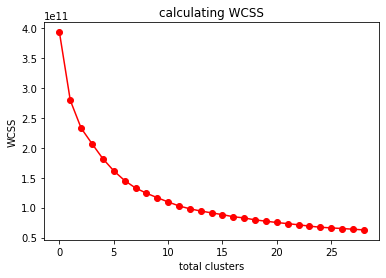

In [7]:
data = data.fillna( data.median() )


vals = data.iloc[ :, 1:].values

from sklearn.cluster import KMeans
# elbow 
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("calculating WCSS")
plt.xlabel("total clusters")
plt.ylabel("WCSS")
plt.show()

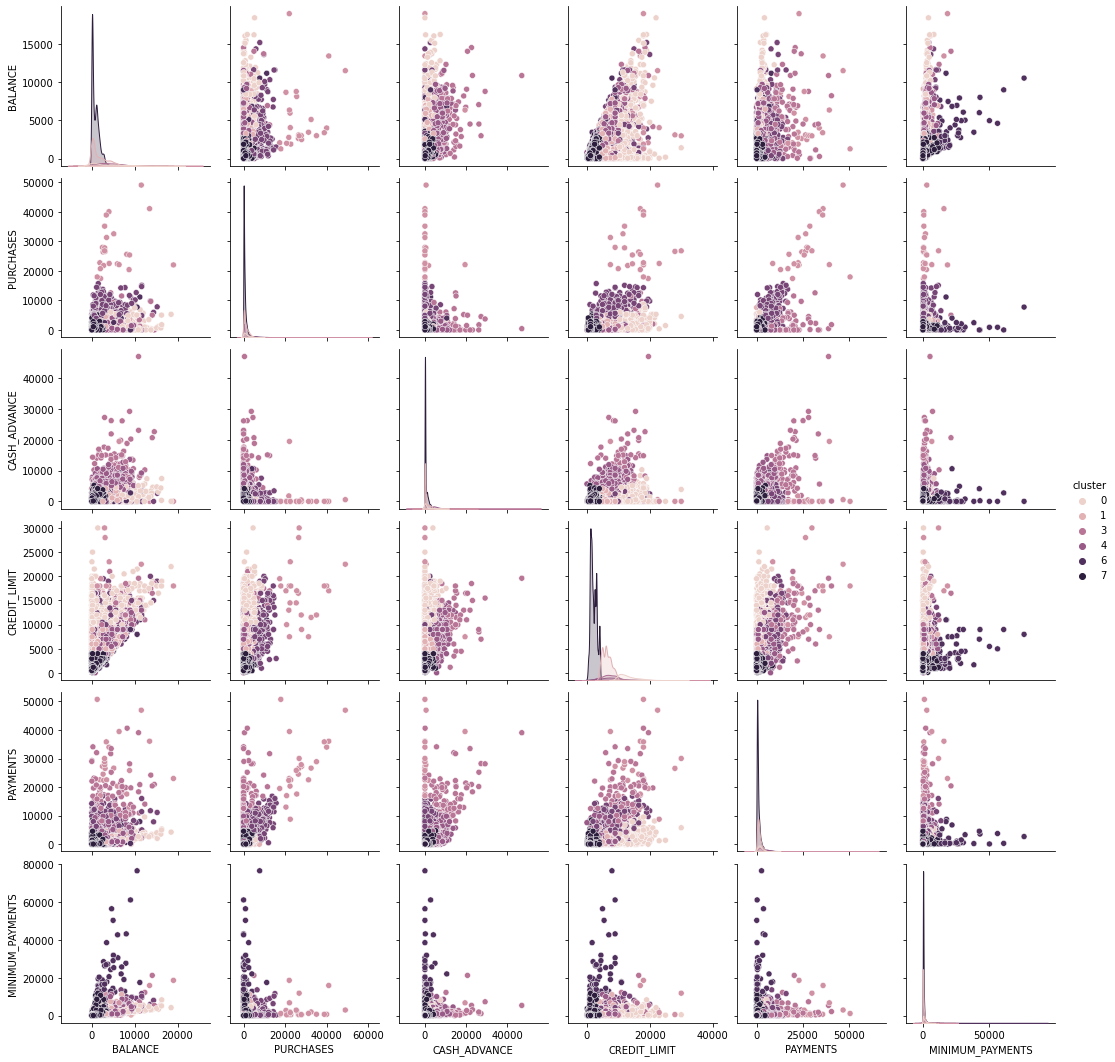

In [8]:
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( vals )
import seaborn as sns
best_columns = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_values = data[best_columns].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_values )

data["cluster"] = y_pred
best_columns.append("cluster")
sns.pairplot( data[ best_columns ], hue="cluster")

